In [1]:
#Import the packages
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl

#Case study on Polynomial Regression -->Built-in dataset -->Boston data

In [2]:
pip show scikit-learn

Name: scikit-learn
Version: 1.1.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\codeg\appdata\local\programs\python\python310\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: sklearn
Note: you may need to restart the kernel to use updated packages.


In [97]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
e = load_boston()
#print(e)

C:\Users\codeg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [4]:
print(type(e))

<class 'sklearn.utils._bunch.Bunch'>


In [5]:
e.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
print(e['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
print(e['data']);
print(e['feature_names'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
dataset = pd.DataFrame(e.data,columns=e.feature_names)
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
#create our target column 'Price'
dataset['Price'] = e.target
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
#As every column is having values let's get some statistical insights -->describe()
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
dataset.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [13]:
#let's get some insights based on above matrix
import matplotlib.pyplot as plt

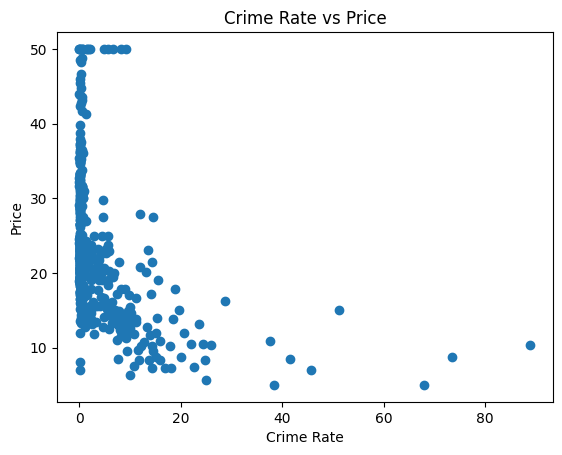

In [14]:
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")
plt.title("Crime Rate vs Price")
plt.show()

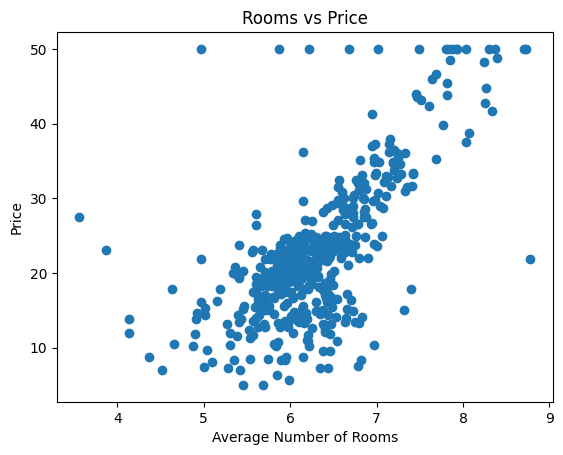

In [15]:
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel("Average Number of Rooms")
plt.ylabel("Price")
plt.title("Rooms vs Price")
plt.show()

In [16]:
import seaborn as sns

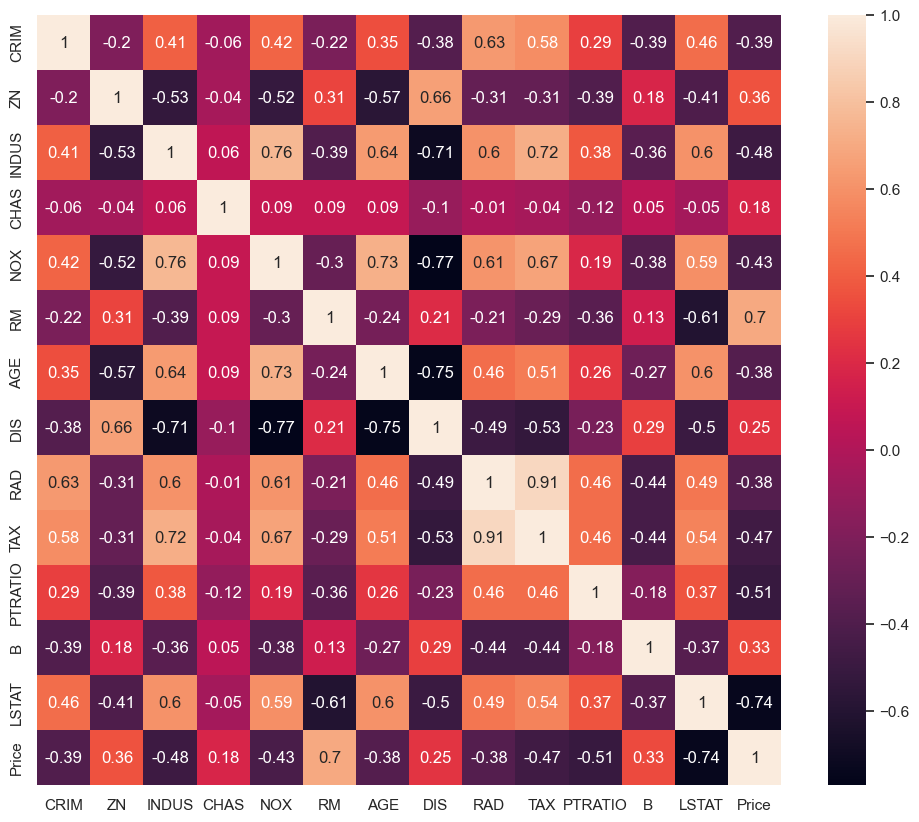

In [17]:
#Use the heatmap function from seaborn to plot the correlation matrix
#plot rectangular data as color encoding matrix
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data= dataset.corr().round(2),annot=True)
plt.show()

In [64]:
#Preparing our dataset for Modeling part 
#Independent and Dependent features
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [65]:
#Splitting data into Training and Testing part
from sklearn.model_selection import train_test_split

In [24]:
#Simple usecase to understand importance of train_test_split with random()
a,b = np.arange(10).reshape(5,2),range(5)
print(a)
print(b)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
range(0, 5)


c,d,e,f=train_test_split(a,b)
print(c)
print(d)
print(e)
print(f)

In [26]:
#adding random_state() will make values to be consistent
train_test_split(a,b,random_state=1)

[array([[8, 9],
        [0, 1],
        [6, 7]]),
 array([[4, 5],
        [2, 3]]),
 [4, 0, 3],
 [2, 1]]

In [66]:
#no we will split our data into training and testing part
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
#print(X_train)
print(X_train.shape)
print(y_test.shape)

(354, 13)
(152,)


In [67]:
#We perform StandardScaler to transform our features to proper scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [68]:
#Transforming our train and test
X_train = sc.fit_transform(X_train)

In [69]:
X_train.shape

(354, 13)

In [70]:
X_test = sc.transform(X_test)

In [71]:
#model training
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [72]:
#fit the data
lin_reg.fit(X_train,y_train)

LinearRegression()

In [75]:
#Get the Feature importances
#we can check what are the important features contributing
#Create a table showing the coefficient (influence) 
#of each of the columns
cdf = pd.DataFrame(lin_reg.coef_,
                   index = X.columns,
                   columns=['Coefficients'])
cdf

,Coefficients
CRIM,-1.108346
ZN,0.808440
INDUS,0.343135
CHAS,0.813864
NOX,-1.798043
RM,2.913858
AGE,-0.298939
DIS,-2.942511
RAD,2.094193
TAX,-1.447067


In [76]:
#predict on the test data
reg_pred = lin_reg.predict(X_test) #Expected values

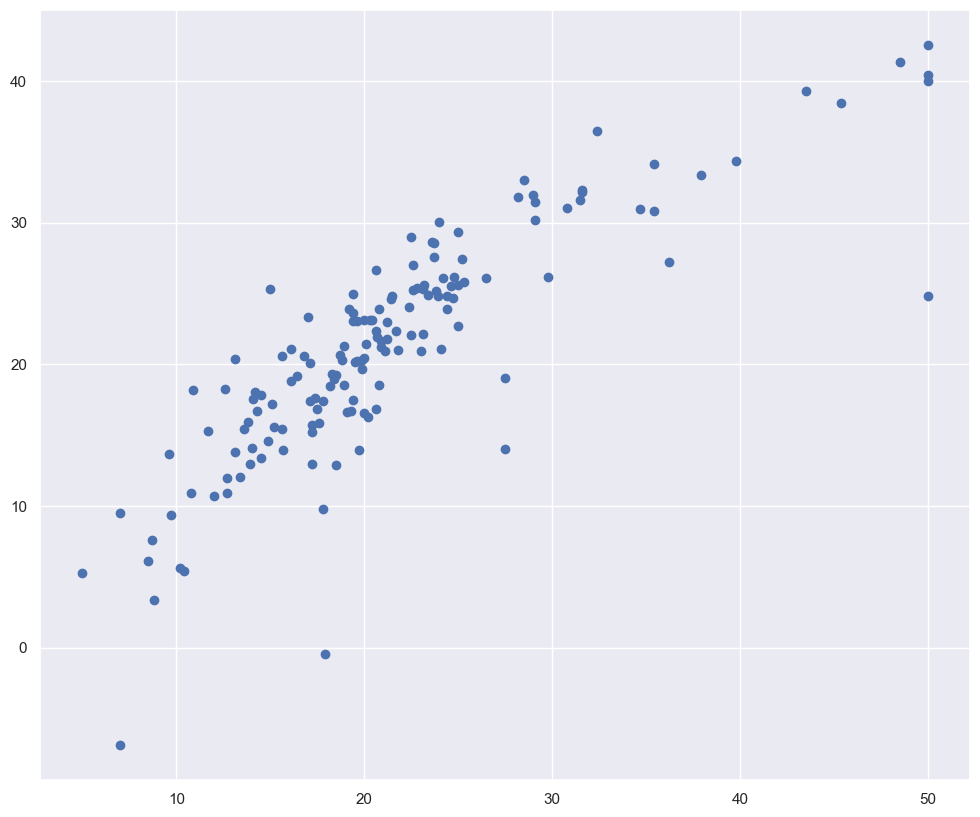

In [77]:
#Plot a Scatter plot for the prediction
plt.scatter(y_test,reg_pred) #y_test -->Actual Values
plt.show()

In [78]:
#Metrics
from sklearn.metrics import mean_squared_error,r2_score
#RMSE along with R-Squared value
print(np.sqrt(mean_squared_error(y_test,reg_pred)))
print((r2_score(y_test,reg_pred))*100)

4.638689926172821
71.12260057484932


In [79]:
#we could pass some input data and check the result
X.iloc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Name: 0, dtype: float64

In [80]:
e.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [81]:
#Instead of using iloc() function we can pick directly from source data
f=e.data[0].reshape(1,-1) #dataset -->load_boston()

In [82]:
outcome=lin_reg.predict(f)
outcome

array([-45.64344024])

In [83]:
#As you can observe price is negative we need to scale it 
scaled = lin_reg.predict([X.iloc[0]])
scaled

array([-45.64344024])

In [84]:
lin_reg.predict(sc.transform([X.iloc[0]]))

C:\Users\codeg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

In [47]:
y[0]

24.0

In [94]:
sc

StandardScaler()

In [48]:
import pickle

In [49]:
pickle.dump(lin_reg,open('regmodel.pkl','wb'))

In [85]:
pickle.dump(sc,open('scaling.pkl','wb'))

In [86]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [95]:
f = pickle.load(open('scaling.pkl','rb'))

StandardScaler()

In [98]:
## Prediction
pickled_model.predict(f.transform(e.data[0].reshape(1,-1)))

C:\Users\codeg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])